In [202]:
import pandas as pd
import numpy as np

In [203]:
df_hof = pd.read_csv('NBA Hall of Famers 2021.csv')
df_hof.columns

Index(['Name', 'position', 'All_star_selections', 'In_Hall_of_fame', 'height',
       'weight', 'born'],
      dtype='object')

In [204]:
df_players = pd.read_csv("nbaplayersdraft.csv")
df_players.columns

Index(['id', 'year', 'rank', 'overall_pick', 'team', 'player', 'college',
       'years_active', 'games', 'minutes_played', 'points', 'total_rebounds',
       'assists', 'field_goal_percentage', '3_point_percentage',
       'free_throw_percentage', 'average_minutes_played', 'points_per_game',
       'average_total_rebounds', 'average_assists', 'win_shares',
       'win_shares_per_48_minutes', 'box_plus_minus',
       'value_over_replacement'],
      dtype='object')

In [205]:
df = pd.merge(df_players, df_hof, left_on='player', right_on='Name', how='left')
df.head()

,id,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,...,win_shares_per_48_minutes,box_plus_minus,value_over_replacement,Name,position,All_star_selections,In_Hall_of_fame,height,weight,born
0,1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,...,0.090,-0.5,4.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,...,0.092,-0.9,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,...,0.109,0.2,13.5,Sean Elliott,F,2.0,0.0,203.0,92.0,1968.0
3,4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,...,0.122,0.8,24.9,Glen Rice,G,3.0,0.0,201.0,97.0,1967.0
4,5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,...,0.070,-2.9,-3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
df = df.drop(df[df['years_active'].isna()].index)
df = df.drop(df[df['games'].isna()].index)
df = df.drop(columns=['college', 'team', 'rank', 'years_active', 'minutes_played'])

In [207]:
df = df.drop(df[df['Name'].isna()].index)

In [208]:
df.isnull().sum()

id                           0
year                         0
overall_pick                 0
player                       0
games                        0
points                       0
total_rebounds               0
assists                      0
field_goal_percentage        0
3_point_percentage           0
free_throw_percentage        0
average_minutes_played       0
points_per_game              0
average_total_rebounds       0
average_assists              0
win_shares                   0
win_shares_per_48_minutes    0
box_plus_minus               0
value_over_replacement       0
Name                         0
position                     0
All_star_selections          0
In_Hall_of_fame              0
height                       0
weight                       0
born                         0
dtype: int64

In [209]:
df.columns

Index(['id', 'year', 'overall_pick', 'player', 'games', 'points',
       'total_rebounds', 'assists', 'field_goal_percentage',
       '3_point_percentage', 'free_throw_percentage', 'average_minutes_played',
       'points_per_game', 'average_total_rebounds', 'average_assists',
       'win_shares', 'win_shares_per_48_minutes', 'box_plus_minus',
       'value_over_replacement', 'Name', 'position', 'All_star_selections',
       'In_Hall_of_fame', 'height', 'weight', 'born'],
      dtype='object')

In [210]:
df = df.drop(columns=['Name', 'born','height', 'weight'])
df.columns

Index(['id', 'year', 'overall_pick', 'player', 'games', 'points',
       'total_rebounds', 'assists', 'field_goal_percentage',
       '3_point_percentage', 'free_throw_percentage', 'average_minutes_played',
       'points_per_game', 'average_total_rebounds', 'average_assists',
       'win_shares', 'win_shares_per_48_minutes', 'box_plus_minus',
       'value_over_replacement', 'position', 'All_star_selections',
       'In_Hall_of_fame'],
      dtype='object')

In [211]:
final_test = df[df["In_Hall_of_fame"] == 2]

In [212]:
df = df[df["In_Hall_of_fame"] != 2]

In [213]:
features_to_drop = ['id', 'year', 'player', 'In_Hall_of_fame', 'position']
X = df.drop(columns=features_to_drop, errors='ignore')
y = df['In_Hall_of_fame']

In [214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Validation performance
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       1.00      0.67      0.80         3

    accuracy                           0.95        22
   macro avg       0.97      0.83      0.89        22
weighted avg       0.96      0.95      0.95        22



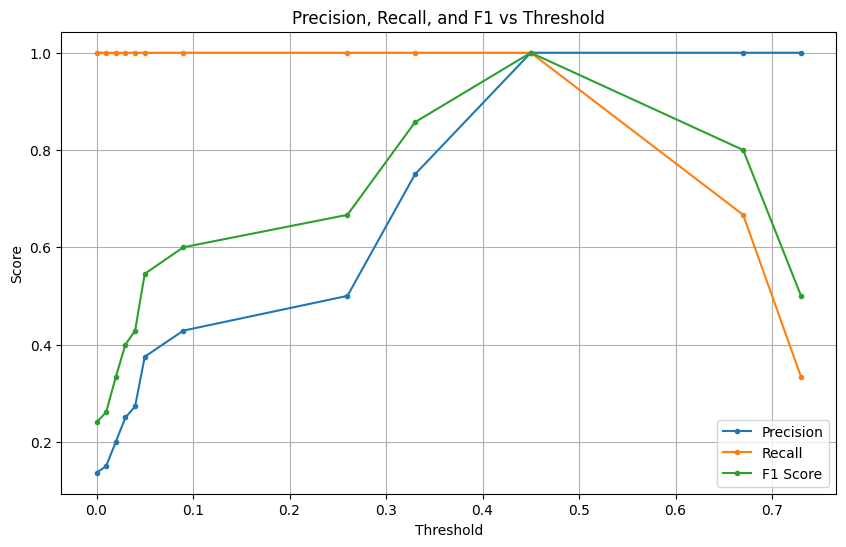

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)

# Train your model as usual
clf.fit(X_train, y_train)

# Get predicted probabilities for class 1 (HOF)
y_probs = clf.predict_proba(X_test)[:, 1]

# Evaluate precision and recall at different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Compute F1 score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision', marker='.')
plt.plot(thresholds, recalls[:-1], label='Recall', marker='.')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', marker='.')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 vs Threshold')
plt.legend()
plt.grid()
plt.show()


In [216]:
# Choose a threshold, say the one maximizing F1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
print("Best Threshold:", best_threshold)

# Apply threshold
y_pred_custom = (y_probs >= best_threshold).astype(int)


Best Threshold: 0.45


In [217]:
from sklearn.metrics import classification_report

# Apply threshold
y_pred_custom = (y_probs >= 0.45).astype(int)

# Evaluate
print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      1.00      1.00         3

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



The code below finds a threshold value above which a player can be inducted or not.

Best Threshold: 0.37

Classification Report @ Best Threshold:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        18
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



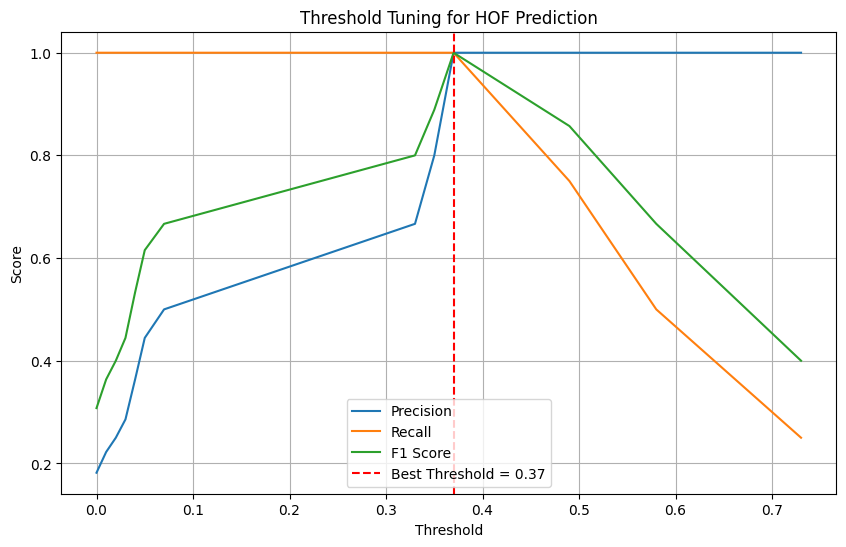

In [218]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Step 1: Filter only rows where In_Hall_of_fame is 0 or 1
df_binary = df[df['In_Hall_of_fame'].isin([0, 1])].copy()

# Step 2: Define features and target
features_to_drop = ['id', 'year', 'player', 'In_Hall_of_fame', 'position']
X = df_binary.drop(columns=features_to_drop, errors='ignore').fillna(0)
y = df_binary['In_Hall_of_fame']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: Train the model
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Step 5: Get probabilities and find best threshold
y_probs = clf.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-6)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Step 6: Evaluate performance at best threshold
y_pred_custom = (y_probs >= best_threshold).astype(int)
print("Best Threshold:", round(best_threshold, 2))
print("\nClassification Report @ Best Threshold:\n")
print(classification_report(y_test, y_pred_custom))

# Step 7: Optional plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best Threshold = {round(best_threshold, 2)}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning for HOF Prediction')
plt.legend()
plt.grid()
plt.show()


In [219]:
# Step 1: Filter active players
df_active = final_test

# Step 2: Prepare features (same processing as before)
X_active = df_active.drop(columns=features_to_drop, errors='ignore').fillna(0)

# Step 3: Predict probabilities using trained model
active_probs = clf.predict_proba(X_active)[:, 1]

# Step 4: Apply threshold of 0.37 to make final predictions
df_active['HOF_probability'] = active_probs
df_active['HOF_predicted'] = (active_probs >= 0.37).astype(int)

# Step 5: Sort results for analysis
df_active_sorted = df_active.sort_values(by='HOF_probability', ascending=False)
print(df_active_sorted[['player', 'HOF_probability', 'HOF_predicted']].head(10))


                 player  HOF_probability  HOF_predicted
1086  Russell Westbrook             0.84              1
1024       Kevin Durant             0.82              1
785        LeBron James             0.81              1
787     Carmelo Anthony             0.76              1
1145       James Harden             0.75              1
1323      Anthony Davis             0.74              1
964   LaMarcus Aldridge             0.72              1
906          Chris Paul             0.69              1
844       Dwight Howard             0.68              1
1149      Stephen Curry             0.50              1


In [220]:
print(df_active[['player', 'HOF_probability', 'HOF_predicted']].head(10))

                 player  HOF_probability  HOF_predicted
785        LeBron James             0.81              1
787     Carmelo Anthony             0.76              1
844       Dwight Howard             0.68              1
852      Andre Iguodala             0.18              0
906          Chris Paul             0.69              1
964   LaMarcus Aldridge             0.72              1
983         Rajon Rondo             0.07              0
986          Kyle Lowry             0.13              0
1009       Paul Millsap             0.11              0
1024       Kevin Durant             0.82              1


In [221]:
df_active_sorted.to_csv('hof_predictions.csv', index=False)